In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
from IPython.display import Markdown

Markdown('[grok](https://grok.com/share/bGVnYWN5_5ae29c65-3c35-4dd2-a201-f8289c17d6c7)')


[grok](https://grok.com/share/bGVnYWN5_5ae29c65-3c35-4dd2-a201-f8289c17d6c7)

In [14]:
dataset = pd.read_csv(r"C:\Users\hegde\Downloads\Salary_Data.csv")

In [52]:
x=dataset["Age"]
x.ndim

1

In [16]:
dataset.shape

(30, 3)

In [18]:
dataset.isnull().sum()

YearsExperience    0
Age                0
Salary             0
dtype: int64


Outliers in YearsExperience: 0
Lower Bound: -3.55, Upper Bound: 14.45

Outliers in Age: 0
Lower Bound: 12.13, Upper Bound: 41.92

Outliers in Salary: 0
Lower Bound: -9015.25, Upper Bound: 166280.75

Total unique rows with at least one outlier: 0


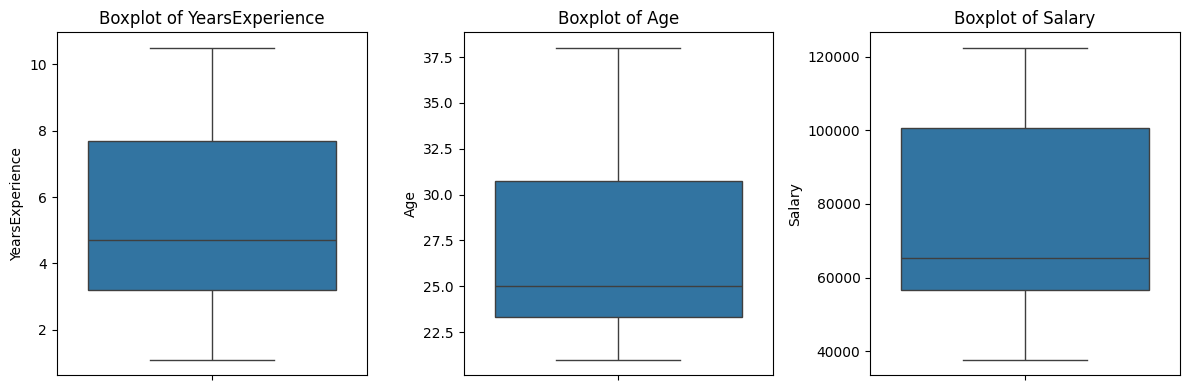

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv(r"C:\Users\hegde\Downloads\Salary_Data.csv")

# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    # Calculate Q1, Q3, and IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Initialize a dictionary to store outlier information
outlier_counts = {}
outlier_details = []

# Check for outliers in each column
columns = ['YearsExperience', 'Age', 'Salary']
for col in columns:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(dataset, col)
    outlier_counts[col] = len(outliers)
    
    # Store details of outliers
    for idx, row in outliers.iterrows():
        outlier_details.append({
            'Column': col,
            'Index': idx,
            'Value': row[col],
            'YearsExperience': row['YearsExperience'],
            'Age': row['Age'],
            'Salary': row['Salary']
        })
    
    print(f"\nOutliers in {col}: {len(outliers)}")
    print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
    if len(outliers) > 0:
        print(outliers[[col]])

# Total unique rows with at least one outlier
unique_outlier_rows = len(set([d['Index'] for d in outlier_details]))
print(f"\nTotal unique rows with at least one outlier: {unique_outlier_rows}")

# Detailed outlier information
if outlier_details:
    print("\nDetailed Outlier Information:")
    for detail in outlier_details:
        print(f"Row {detail['Index']} in {detail['Column']}: Value = {detail['Value']:.2f}, "
              f"YearsExperience = {detail['YearsExperience']:.2f}, Age = {detail['Age']:.2f}, "
              f"Salary = {detail['Salary']:.2f}")

# Visualize outliers with boxplots
plt.figure(figsize=(12, 4))
for i, col in enumerate(columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=dataset[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

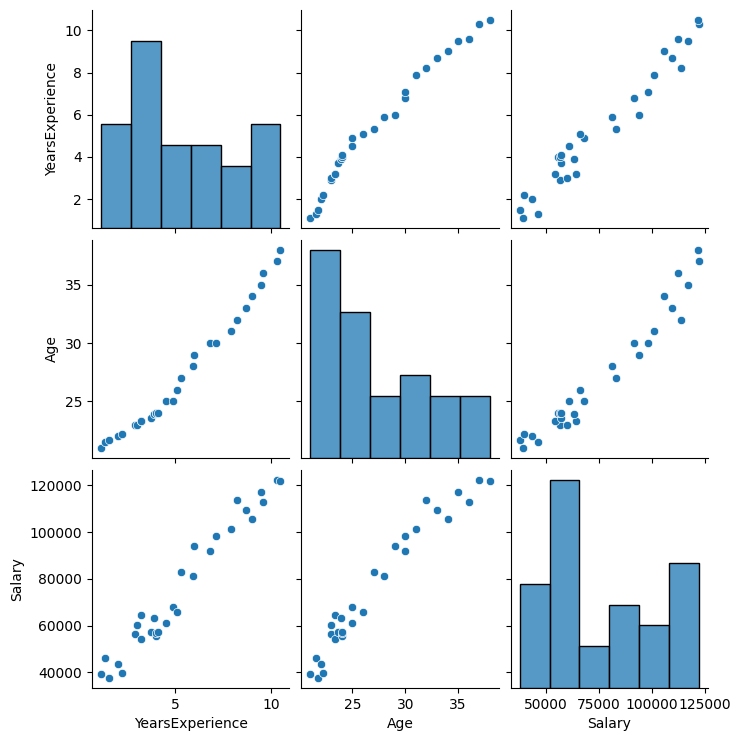

In [22]:
sns.pairplot(data=dataset)
plt.show()

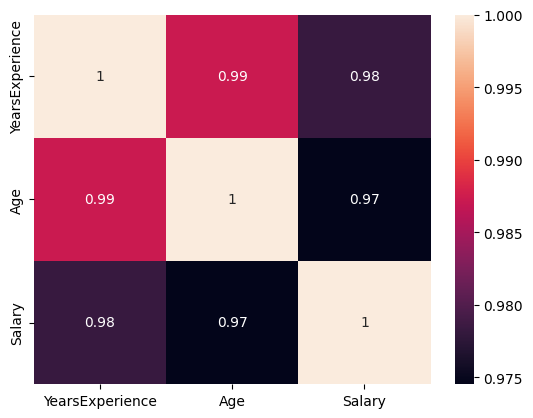

In [24]:
sns.heatmap(data=dataset.corr(),annot=True)
plt.savefig("sal.jpg")
plt.show()

In [26]:
x=dataset.iloc[:,:-1]
y=dataset["Salary"]

In [28]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
from sklearn.linear_model import LinearRegression

In [36]:
lr=LinearRegression()

In [38]:
lr.fit(x_train,y_train)

LinearRegression()

In [42]:
lr.score(x_test,y_test)*100

88.52101657216537

In [46]:
lr.predict(x_test)

array([118686.60525402,  67497.80208802, 101581.52273219,  74585.69879684,
        54833.367916  ,  58044.6977654 ])

In [50]:
x.ndim

2